In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
game_df = pd.read_csv('vgsales.csv')

In [3]:
growth = game_df[["Year","NA_Sales","EU_Sales","JP_Sales","Other_Sales","Global_Sales"]].groupby("Year").sum()

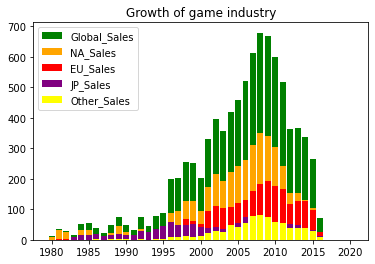

In [4]:
plt.bar(growth.index,growth["Global_Sales"],color = "green",label = "Global_Sales")
plt.bar(growth.index,growth["NA_Sales"],color = "orange",label = "NA_Sales")
plt.bar(growth.index,growth["EU_Sales"],color = "red",label = "EU_Sales")
plt.bar(growth.index,growth["JP_Sales"],color = "purple",label = "JP_Sales")
plt.bar(growth.index,growth["Other_Sales"],color = "yellow",label = "Other_Sales")
plt.legend()
plt.title("Growth of game industry");

In [5]:
t1 = game_df[["Year","Genre","Global_Sales"]].groupby(["Year","Genre"]).sum().unstack(0).idxmax()
t2 = game_df[["Year","Genre","Global_Sales"]].groupby(["Year","Genre"]).sum().groupby(["Year"]).max()
t1.reset_index(level = 0,inplace = True,drop = True)
t1.name="Genre"
t2.name="Sales"
best_genre_overtime = pd.concat([t1, t2], axis=1)

In [6]:
best_genre_overtime.head()

,Genre,Global_Sales
Year,,
1980.0,Shooter,7.07
1981.0,Action,14.84
1982.0,Puzzle,10.03
1983.0,Platform,6.93
1984.0,Shooter,31.10


In [7]:
b_genres = best_genre_overtime["Genre"].unique()
games_db = game_df[["Year","Genre","Name"]].groupby(["Year","Genre"]).size().unstack(1).fillna(0)

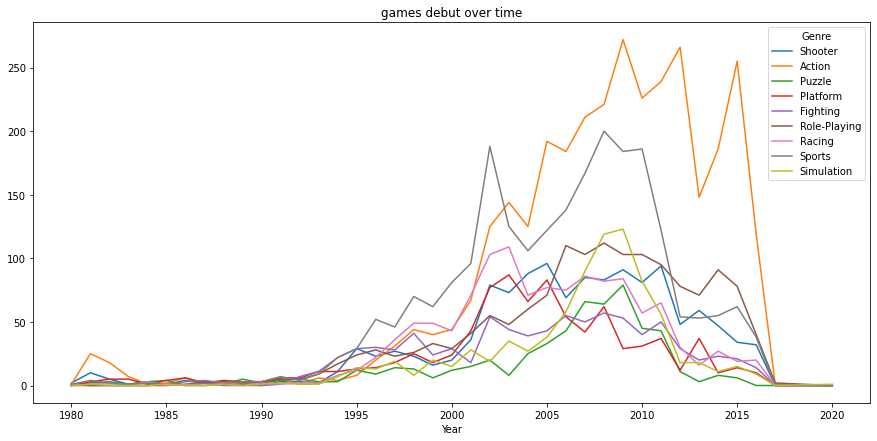

In [8]:
games_db[b_genres].plot(figsize = (15,7))
plt.title("games debut over time");

In [9]:
games_sale = game_df[["Year","Genre","Global_Sales"]].groupby(["Year","Genre"]).sum().unstack(1).fillna(0)
games_sale.columns = games_sale.columns.droplevel(0)

<AxesSubplot:xlabel='Genre', ylabel='Year'>

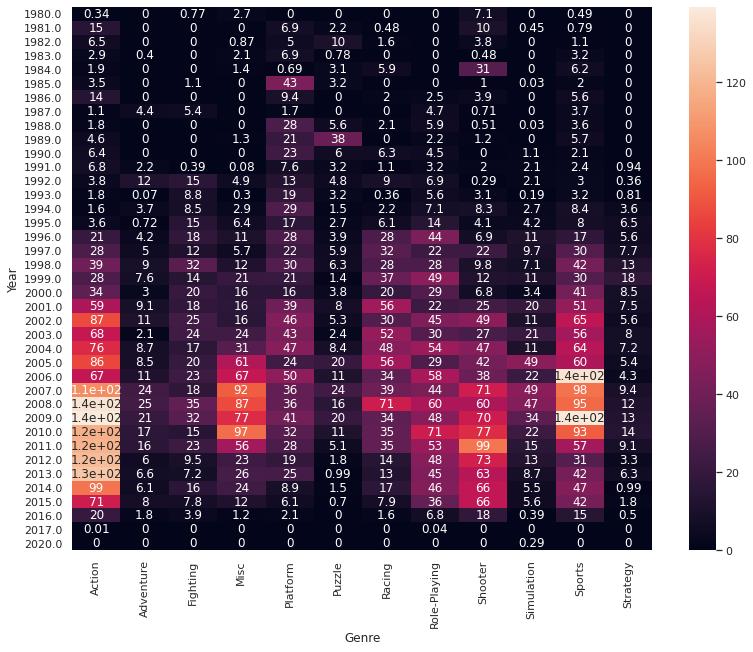

In [10]:
sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(games_sale, annot=True)

In [11]:
plat_db = game_df[["Year","Platform","Name"]].groupby(["Year","Platform"]).size().unstack(1).fillna(0)
top_plat = plat_db.sum(axis=0).sort_values(axis=0, ascending=False).head(10).index

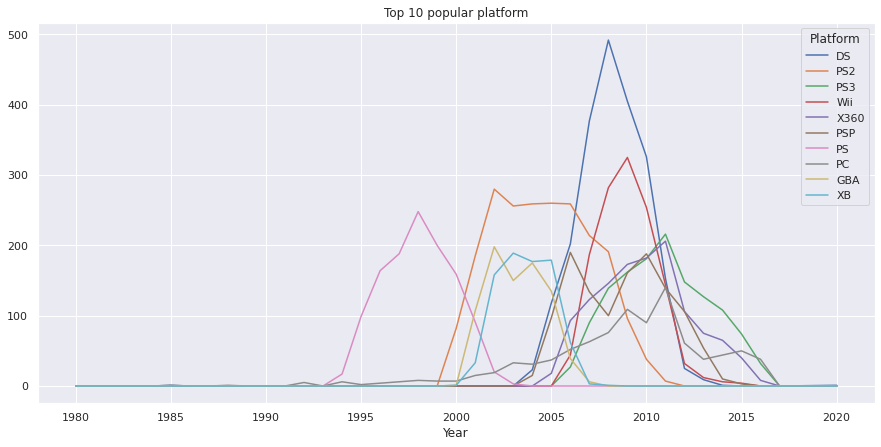

In [12]:
plat_db[top_plat].plot(figsize = (15,7))
plt.title("Top 10 popular platform");

In [13]:
game_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


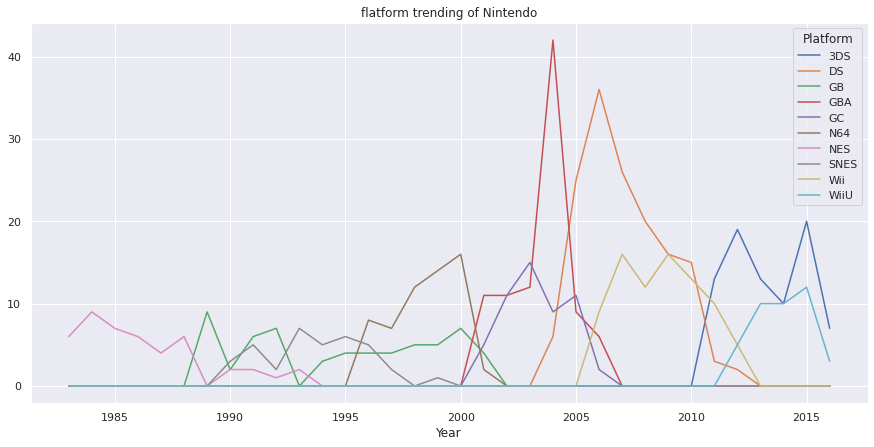

In [15]:
nintendo = game_df[game_df["Publisher"] == "Nintendo"]
nintendo = nintendo[["Year","Platform","Name"]].groupby(["Year","Platform"]).size().unstack(1).fillna(0)
nintendo.plot(figsize = (15,7))
plt.title("flatform trending of Nintendo");